# SWAflow example

In [1]:
from swaflow import SwaModel, SwaCallback
import tensorflow as tf
tf.random.set_seed(42)

Define a simple tensorflow model

In [2]:
class SwaLeaky(SwaModel):
    def __init__(self, nOut):
        super(SwaLeaky, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128)
        self.act1 = tf.keras.layers.LeakyReLU(alpha=0.1)
        self.dense2 = tf.keras.layers.Dense(128)
        self.act2 = tf.keras.layers.LeakyReLU(alpha=0.1)
        self.dense3 = tf.keras.layers.Dense(nOut)

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense1(x)
        x = self.act1(x)
        x = self.dense2(x)
        x = self.act2(x)
        return self.dense3(x)

Compile it

In [3]:
model = SwaLeaky(1)
model.compile(loss='mse')

Create some data

In [4]:
xs = tf.random.uniform((1000, 2))
ys = tf.reduce_sum(xs, axis=1, keepdims=True)
model.fit(xs, ys, epochs=50, callbacks=[SwaCallback()])

Epoch 1/50


2022-04-07 12:05:56.348461: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 566us/step - loss: 0.0895
Epoch 2/50
32/32 [==============================] - 0s 482us/step - loss: 0.0023
Epoch 3/50
32/32 [==============================] - 0s 459us/step - loss: 0.0028
Epoch 4/50
32/32 [==============================] - 0s 457us/step - loss: 0.0024
Epoch 5/50
32/32 [==============================] - 0s 453us/step - loss: 0.0020
Epoch 6/50
32/32 [==============================] - 0s 457us/step - loss: 0.0020
Epoch 7/50
32/32 [==============================] - 0s 468us/step - loss: 0.0019
Epoch 8/50
32/32 [==============================] - 0s 458us/step - loss: 0.0017
Epoch 9/50
32/32 [==============================] - 0s 460us/step - loss: 0.0019
Epoch 10/50
32/32 [==============================] - 0s 457us/step - loss: 0.0018
Epoch 11/50
32/32 [==============================] - 0s 461us/step - loss: 0.0016
Epoch 12/50
32/32 [==============================] - 0s 463us/step - loss: 0.0015
Epoch 13/50
32/32 [=================

For the validation data, use data outside of the training range, to test extrapolation

In [5]:
xval = tf.random.uniform((5, 2))+0.5
yval = tf.reduce_sum(xval, axis=1, keepdims=True)

In [6]:
ypred = model.predict(xval)

In [7]:
mu, sigma = model.predict_with_errors(xval, scale = 0.5)

In [8]:
import matplotlib.pyplot as plt

In [9]:
yval = yval.numpy()[:,0]
ypred = ypred[:,0]
#ypred = ypred.numpy()
mu = mu.numpy()[:,0]
sigma = sigma.numpy()[:,0]

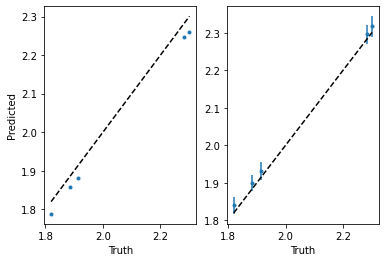

In [10]:
low = min(yval)
high = max(yval)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].plot(yval, ypred, '.')
axs[0].set_xlabel("Truth")
axs[0].set_ylabel("Predicted")
axs[0].plot([low, high], [low, high], ls = '--', color = 'k')

axs[1].errorbar(yval, mu, yerr = sigma, fmt = '.')
axs[1].set_xlabel("Truth")
axs[1].plot([low, high], [low, high], ls = '--', color = 'k')